In [109]:
import pandas as pd
import numpy as np
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [110]:
df=pd.read_csv(r"online.csv")
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [111]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [112]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [113]:
df.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [114]:
df.shape

(6362620, 11)

In [115]:
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

The df.isnull().sum() function is used in pandas to identify the number of missing (null or NaN) values in each column of a DataFrame (df).


df.isnull():

Returns a DataFrame of the same shape as df with True for missing (NaN) values and False otherwise.

.sum():

When applied to the result of isnull(), it calculates the sum of True values (i.e., the count of NaN values) for each column.

In [116]:
df.dtypes

step                int64
type               object
amount            float64
nameOrig           object
oldbalanceOrg     float64
newbalanceOrig    float64
nameDest           object
oldbalanceDest    float64
newbalanceDest    float64
isFraud             int64
isFlaggedFraud      int64
dtype: object

In [117]:
df.nunique

<bound method DataFrame.nunique of          step      type      amount     nameOrig  oldbalanceOrg  \
0           1   PAYMENT     9839.64  C1231006815      170136.00   
1           1   PAYMENT     1864.28  C1666544295       21249.00   
2           1  TRANSFER      181.00  C1305486145         181.00   
3           1  CASH_OUT      181.00   C840083671         181.00   
4           1   PAYMENT    11668.14  C2048537720       41554.00   
...       ...       ...         ...          ...            ...   
6362615   743  CASH_OUT   339682.13   C786484425      339682.13   
6362616   743  TRANSFER  6311409.28  C1529008245     6311409.28   
6362617   743  CASH_OUT  6311409.28  C1162922333     6311409.28   
6362618   743  TRANSFER   850002.52  C1685995037      850002.52   
6362619   743  CASH_OUT   850002.52  C1280323807      850002.52   

         newbalanceOrig     nameDest  oldbalanceDest  newbalanceDest  isFraud  \
0             160296.36  M1979787155            0.00            0.00        0  

The df.nunique() function in pandas is used to calculate the number of unique values in each column of a DataFrame (df).

df.nunique():

Returns a Series with the count of unique values for each column.
By default, it excludes NaN values from the count.

Parameters:

axis: Default is 0 (column-wise). Use 1 for row-wise unique counts.

dropna: Default is True (does not count NaN as a unique value). Set to False to include NaN in the count.


In [118]:
# Check the proportion of missing values
print("\nProportion of Missing Values in Each Column:")
print((df.isnull().sum() / len(df)) * 100)


Proportion of Missing Values in Each Column:
step              0.0
type              0.0
amount            0.0
nameOrig          0.0
oldbalanceOrg     0.0
newbalanceOrig    0.0
nameDest          0.0
oldbalanceDest    0.0
newbalanceDest    0.0
isFraud           0.0
isFlaggedFraud    0.0
dtype: float64


In [119]:
## finding the null values
df['isFraud'].value_counts()

isFraud
0    6354407
1       8213
Name: count, dtype: int64

In [120]:
df.size

69988820

In [121]:
#finding the correlation
df.select_dtypes(include='int').corr()

,step,isFraud,isFlaggedFraud
step,1.000000,0.031578,0.003277
isFraud,0.031578,1.000000,0.044109
isFlaggedFraud,0.003277,0.044109,1.000000


In [122]:
#finding without any nunll values
df[df.notnull()]

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0


In [123]:
#checking the unique values in all columns
for i in df.columns:
    print(df[i].value_counts())
    print("="*20)

step
19     51352
18     49579
187    49083
235    47491
307    46968
       ...  
432        4
706        4
693        4
112        2
662        2
Name: count, Length: 743, dtype: int64
type
CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: count, dtype: int64
amount
10000000.00    3207
10000.00         88
5000.00          79
15000.00         68
500.00           65
               ... 
8513.48           1
189137.90         1
1615.78           1
128891.19         1
12257.89          1
Name: count, Length: 5316900, dtype: int64
nameOrig
C1902386530    3
C363736674     3
C545315117     3
C724452879     3
C1784010646    3
              ..
C98968405      1
C720209255     1
C1567523029    1
C644777639     1
C1280323807    1
Name: count, Length: 6353307, dtype: int64
oldbalanceOrg
0.00         2102449
184.00           918
133.00           914
195.00           912
164.00           909
              ...   
34577.49           1
184929.21   

Preprocessing Your Data

In [124]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE



In [125]:
# Identify features and target
X = df[['amount','oldbalanceOrg','newbalanceOrig']] 
y = df['isFraud']

In [126]:
#resampling
from sklearn.utils import resample
import pandas as pd

# Assuming df contains your dataset with 'amount', 'oldbalanceOrg', 'newbalanceOrig', and 'isFraud'
X = df[['amount', 'oldbalanceOrg', 'newbalanceOrig']]  # Features
y = df['isFraud']  # Target variable

# Separate the majority and minority classes
majority = df[df['isFraud'] == 0]  # Non-fraudulent transactions (majority class)
minority = df[df['isFraud'] == 1]  # Fraudulent transactions (minority class)


# Undersample the majority class (non-fraud transactions) to match minority class size
majority_undersampled = resample(majority, 
                                 replace=False,  # No replacement
                                 n_samples=len(minority),  # Match minority size
                                 random_state=42)  # For reproducibility

# Combine the resampled data
df_resampled = pd.concat([majority_undersampled, minority])

# Separate the resampled features and target
X_resampled = df_resampled[['amount', 'oldbalanceOrg', 'newbalanceOrig']]  # Adjust based on your features
y_resampled = df_resampled['isFraud']

# Check the resampled class distribution
print("Resampled class distribution:")
print(y_resampled.value_counts())






Resampled class distribution:
isFraud
0    8213
1    8213
Name: count, dtype: int64


In [127]:
X_resampled

,amount,oldbalanceOrg,newbalanceOrig
1777056,183806.32,19391.00,0.00
1350600,521.37,0.00,0.00
1991933,3478.18,19853.00,16374.82
5092368,1716.05,5769.17,4053.13
5066515,253129.93,1328499.49,1581629.42
...,...,...,...
6362615,339682.13,339682.13,0.00
6362616,6311409.28,6311409.28,0.00
6362617,6311409.28,6311409.28,0.00
6362618,850002.52,850002.52,0.00


In [128]:
X_resampled.value_counts()

amount       oldbalanceOrg  newbalanceOrig
10000000.00  10000000.00    0.00              142
0.00         0.00           0.00               16
1165187.89   1165187.89     0.00                4
429257.45    429257.45      0.00                4
33676.59     33676.59       0.00                2
                                             ... 
56403.43     9206963.60     9263367.04          1
56423.59     0.00           0.00                1
56479.42     94170.80       150650.21           1
56484.74     108808.27      52323.54            1
31479113.67  0.00           0.00                1
Name: count, Length: 12333, dtype: int64

In [129]:
y_resampled


1777056    0
1350600    0
1991933    0
5092368    0
5066515    0
          ..
6362615    1
6362616    1
6362617    1
6362618    1
6362619    1
Name: isFraud, Length: 16426, dtype: int64

In [130]:
y_resampled.value_counts()

isFraud
0    8213
1    8213
Name: count, dtype: int64

In [131]:
#feature scaling
from sklearn.preprocessing import MinMaxScaler

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

#Fit the scaler on the training data and transform both the training and test data
X_resampled_scaled = scaler.fit_transform(X_resampled)

# Convert the scaled data back to a DataFrame for better readability (optional)
X_resampled_scaled_df = pd.DataFrame(X_resampled_scaled, columns=['amount', 'oldbalanceOrg', 'newbalanceOrig'])

# Check the scaled data
print("Scaled features (first 5 rows):")
print(X_resampled_scaled_df.head())


Scaled features (first 5 rows):
     amount  oldbalanceOrg  newbalanceOrig
0  0.005839       0.000325        0.000000
1  0.000017       0.000000        0.000000
2  0.000110       0.000333        0.000330
3  0.000055       0.000097        0.000082
4  0.008041       0.022296        0.031897


In [132]:
from sklearn.model_selection import train_test_split

# Assuming the previous code has been executed and X_resampled, y_resampled are defined

# Split the resampled data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)

# Check the shape of the split data
print(f"Training data shape: {X_train.shape}")
print(f"Testing data shape: {X_test.shape}")


Training data shape: (11498, 3)
Testing data shape: (4928, 3)


In [133]:
# # #Handle class imbalance
# # from imblearn.over_sampling import SMOTE

# # smote = SMOTE(random_state=42)
# # X_resampled, y_resampled = smote.fit_resample(X, y_binary)

# from imblearn.over_sampling import SMOTE

# # Apply SMOTE to generate synthetic samples for the minority class (fraud transactions)
# smote = SMOTE(random_state=42)
# X_resampled_smote, y_resampled_smote = smote.fit_resample(X, y)

# # Check the class distribution after SMOTE
# print("SMOTE Resampled class distribution:")
# print(pd.Series(y_resampled_smote).value_counts())


X refers to the feature matrix (input features).

y refers to the target vector (labels).

smote.fit_resample(X, y) applies SMOTE to balance the class distribution by generating synthetic samples for the minority class. The result is two arrays:

X_resampled: The resampled feature matrix.

y_resampled: The resampled target vector.

How SMOTE Works:

SMOTE creates synthetic samples by selecting examples from the minority class and generating new samples that are combinations of these existing samples. It ensures that the new samples are similar to the original ones, but not exact replicas, helping to reduce overfitting.

The primary goal is to balance the class distribution, making it more suitable for training classification models that can be biased towards the majority class when dealing with imbalanced datasets.


In [134]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
try:
    X_resampled, y_resampled = smote.fit_resample(X_resampled, y_resampled)
    print("SMOTE applied successfully")
except Exception as e:
    print(f"Error during SMOTE: {e}")


SMOTE applied successfully


In [135]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)


In [136]:
#feature scaling
from sklearn.preprocessing import MinMaxScaler

# Initialize the scaler
scaler = MinMaxScaler()

# Scale the features
X_resampled_scaled = scaler.fit_transform(X_resampled)

# Check scaled feature range
print("Scaled feature range:", X_resampled_scaled.min(axis=0), "to", X_resampled_scaled.max(axis=0))



Scaled feature range: [0. 0. 0.] to [1. 1. 1.]


Train Models

Using Random Forest

In [ ]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import roc_auc_score  # Importing roc_auc_score

# Split the data into features (X) and target (y)
X = df[['amount', 'oldbalanceOrg', 'newbalanceOrig']]  # Features
y = df['isFraud']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)

# Initialize the Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf.fit(X_train, y_train)

# Make predictions
y_pred = rf.predict(X_test)

# Evaluate the model
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print("Classification Report:\n", classification_report(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, rf.predict_proba(X_test)[:, 1]))




Accuracy: 0.9906655844155844
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      0.99      2479
           1       0.99      1.00      0.99      2449

    accuracy                           0.99      4928
   macro avg       0.99      0.99      0.99      4928
weighted avg       0.99      0.99      0.99      4928

ROC-AUC: 0.9971891285738546


##
Explanation of the Output:

1)classification_report(y_test, y_pred):
This provides detailed classification metrics like precision, recall, f1-score, and support for both fraudulent (1) and non-fraudulent (0) transactions.

2)roc_auc_score(y_test, rf_model.predict_proba(X_test)[:, 1]):
This computes the ROC-AUC score, which evaluates the model's ability to discriminate between the two classes (fraud vs. non-fraud).
predict_proba(X_test)[:, 1] gives the predicted probabilities for the positive class (isFraud = 1).

Expected Output:

1)Classification Report: You'll see the precision, recall, and F1 score for both the fraudulent and non-fraudulent transactions.

2)ROC-AUC: This will indicate how well the model distinguishes between fraudulent and non-fraudulent transactions.

Using AdaBoost

In [169]:
from sklearn.ensemble import AdaBoostClassifier

adaboost = AdaBoostClassifier(random_state=42)
adaboost.fit(X_train, y_train)
y_pred = adaboost.predict(X_test)

print("AdaBoost Performance:")
print(classification_report(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, adaboost.predict_proba(X_test)[:, 1]))
# Save the model with joblib
joblib.dump(adaboost, 'adaboost_model.pkl')


AdaBoost Performance:
              precision    recall  f1-score   support

           0       0.95      0.95      0.95      2479
           1       0.95      0.95      0.95      2449

    accuracy                           0.95      4928
   macro avg       0.95      0.95      0.95      4928
weighted avg       0.95      0.95      0.95      4928

ROC-AUC: 0.9880493079392417


['adaboost_model.pkl']

##
Explanation of the Output:

1)classification_report(y_test, y_pred):
This provides detailed classification metrics like precision, recall, f1-score, and support for both fraudulent (1) and non-fraudulent (0) transactions.

2)roc_auc_score(y_test, rf_model.predict_proba(X_test)[:, 1]):
This computes the ROC-AUC score, which evaluates the model's ability to discriminate between the two classes (fraud vs. non-fraud).
predict_proba(X_test)[:, 1] gives the predicted probabilities for the positive class (isFraud = 1).

Expected Output:

1)Classification Report: You'll see the precision, recall, and F1 score for both the fraudulent and non-fraudulent transactions.

2)ROC-AUC: This will indicate how well the model distinguishes between fraudulent and non-fraudulent transactions.

XGBoost

In [139]:
# from xgboost import XGBClassifier

# xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
# xgb_model.fit(X_train, y_train)
# y_pred = xgb_model.predict(X_test)

# print("XGBoost Performance:")
# print(classification_report(y_test, y_pred))
# print("ROC-AUC:", roc_auc_score(y_test, xgb_model.predict_proba(X_test)[:, 1]))


In [140]:
from xgboost import XGBClassifier

xg = XGBClassifier(eval_metric='logloss', random_state=42)
xg.fit(X_train, y_train)
y_pred = xg.predict(X_test)

print("XGBoost Performance:")
print(classification_report(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, xg.predict_proba(X_test)[:, 1]))


XGBoost Performance:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99      2479
           1       0.98      1.00      0.99      2449

    accuracy                           0.99      4928
   macro avg       0.99      0.99      0.99      4928
weighted avg       0.99      0.99      0.99      4928

ROC-AUC: 0.9976219187685337


Key Points:

1)use_label_encoder=False: This prevents warnings related to label encoding in the newer versions of XGBoost.

2)eval_metric='logloss': This metric is commonly used for binary classification, such as fraud detection.

3)roc_auc_score(y_test, xgb_model.predict_proba(X_test)[:, 1]): This computes the ROC-AUC score for evaluating the model's performance.

Expected Output:

1)Classification Report: Will show metrics like precision, recall, F1 score, and support for both fraudulent (1) and non-fraudulent (0) transactions.

2)ROC-AUC Score: Will show how well the model distinguishes between fraudulent and non-fraudulent transactions.

Using Deep Learning Neural Network

Epoch 1/20


c:\Users\santosh\anaconda3\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


360/360 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8186 - loss: 19802.5410 - val_accuracy: 0.9316 - val_loss: 469.7419
Epoch 2/20
360/360 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9303 - loss: 539.2902 - val_accuracy: 0.9217 - val_loss: 411.0056
Epoch 3/20
360/360 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9323 - loss: 302.0710 - val_accuracy: 0.9371 - val_loss: 236.6794
Epoch 4/20
360/360 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9309 - loss: 407.0363 - val_accuracy: 0.9407 - val_loss: 99.9889
Epoch 5/20
360/360 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9284 - loss: 596.0151 - val_accuracy: 0.9237 - val_loss: 310.1484
Epoch 6/20
360/360 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9288 - loss: 290.1010 - val_accuracy: 0.9292 - val_loss: 173.9966
Epoch 7/20
360/360 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9275 - loss: 373.2298 - val_accuracy: 0.9359 - val_loss: 604.1492
Epoch 8/20
360/360 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9375 - loss: 438.045

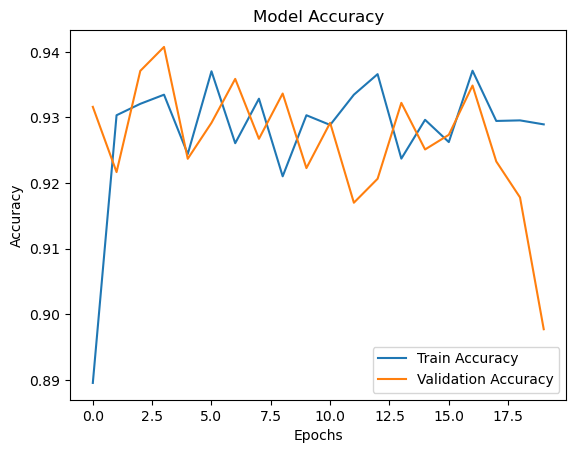

In [141]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
import matplotlib.pyplot as plt

# Train the model and capture the history
# Deep Neural Network (DNN)
dnn = Sequential([
    Dense(32, activation='relu', input_dim=X_train.shape[1]),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')  # Binary classification

])

# Compile the model
dnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = dnn.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

# Plot accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()



Code Overview:

1)Model Architecture:

*Input Layer: Matches the feature size (input_shape=(X_train.shape[1],)).
*Hidden Layers:
  -128 neurons in the first layer with ReLU activation.
  -64 neurons in the second layer with ReLU activation.
  -Dropout layers (30% of neurons dropped) to prevent overfitting.
*Output Layer:
  -Single neuron with sigmoid activation for binary classification (fraud or not fraud).

2)Compilation:

*Optimizer: adam for adaptive learning.
*Loss Function: binary_crossentropy, suitable for binary classification.
*Metrics: Tracks model accuracy during training.

3)Training:

*Epochs: 2 (adjustable, typically requires more for better results).
*Batch Size: 32.
*Validation Data: Splits part of the dataset for validation during training.



WOA

In [142]:
# import matplotlib.pyplot as plt

# # Train the model and capture the history
# history = dnn_model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

# # Plot accuracy
# plt.plot(history.history['accuracy'], label='Train Accuracy')
# plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
# plt.title('Model Accuracy')
# plt.xlabel('Epochs')
# plt.ylabel('Accuracy')
# plt.legend()
# plt.show()


Interpretability frameworks (LIME, SHAP)


In [143]:
import lime.lime_tabular

# Ensure feature names are consistent
feature_names = X_train.columns if isinstance(X_train, pd.DataFrame) else [f"feature_{i}" for i in range(X_train.shape[1])]

# Initialize LimeTabularExplainer
explainer = lime.lime_tabular.LimeTabularExplainer(
    X_train.values if isinstance(X_train, pd.DataFrame) else X_train,
    feature_names=list(feature_names),
    class_names=['Not Fraud', 'Fraud'], 
    mode='classification'
)

# Explain the first instance
exp = explainer.explain_instance(
    X_test.iloc[0].values if isinstance(X_test, pd.DataFrame) else X_test[0], 
    rf_model.predict_proba
)

# Display explanation
exp.show_in_notebook()



c:\Users\santosh\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


LIME works by generating synthetic data points around the instance you're explaining. It then trains a simple, interpretable model (like a linear model) on this synthetic data to approximate the complex model's decision boundary locally.

SHAP

 99%|===================| 9715/9856 [00:58<00:00]        

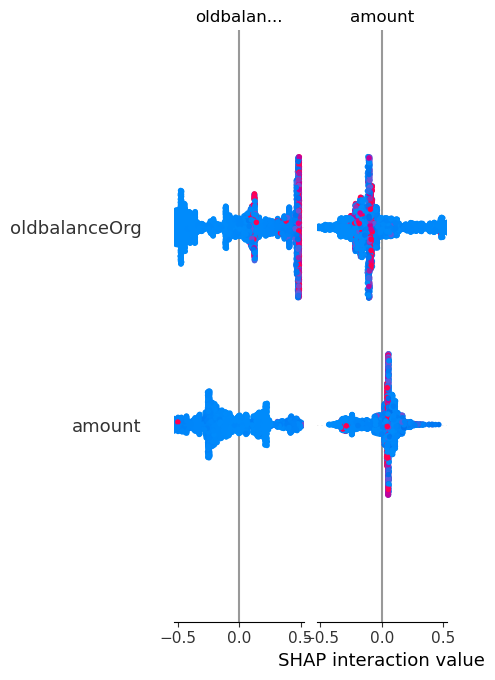

In [144]:
import shap
from sklearn.ensemble import RandomForestClassifier

# Train the Random Forest model
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

# Use SHAP after training
import shap
explainer = shap.TreeExplainer(rf,X_train)
shap_values = explainer.shap_values(X_test)

# Plot SHAP summary
shap.summary_plot(shap_values, X_test, feature_names=X_test.columns)




In [145]:
# print("Random Forest Estimators Count:", len(rf.estimators_))


In [146]:
import pandas as pd

X_train_df = pd.DataFrame(X_train, columns=['isFraud', 'isFlaggedFraud', 'newbalanceDest'])
y_train_df = pd.Series(y_train, name='isFraud')

print(X_train_df.info())
print(y_train_df.value_counts())








<class 'pandas.core.frame.DataFrame'>
Index: 11498 entries, 1420 to 15795
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   isFraud         0 non-null      float64
 1   isFlaggedFraud  0 non-null      float64
 2   newbalanceDest  0 non-null      float64
dtypes: float64(3)
memory usage: 359.3 KB
None
isFraud
1    5764
0    5734
Name: count, dtype: int64


In [163]:
rf.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [148]:


# Convert X_test to a DataFrame (if needed)
if isinstance(X_test, np.ndarray):
    X_test = pd.DataFrame(X_test, columns=feature_names)  # Ensure 'feature_names' is defined
     


In [149]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, adaboost.predict_proba(X_test)[:, 1]))


Accuracy: 0.989448051948052
Precision: 0.9826822392267418
Recall: 0.9963250306247448
F1 Score: 0.989456609894566
ROC-AUC: 0.9880493079392417


In [150]:
from sklearn.metrics import accuracy_score

# Train the model
ada = AdaBoostClassifier(random_state=42)
ada.fit(X_train, y_train)

# Predict on both training and test data
y_train_pred = adaboost.predict(X_train)
y_test_pred = adaboost.predict(X_test)

# Calculate training accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print("Training Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)



Training Accuracy: 0.9552096016698556
Test Accuracy: 0.950689935064935


In [151]:
#resampling
#dataset imbalance
#10 epochs
#accuracy plot(models)
#model compasrion



In [152]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Assuming df is your original dataset
X = df[['amount', 'oldbalanceOrg', 'newbalanceOrig']]  # Features
y = df['isFraud']  # Target variable

# Feature scaling (Min-Max Scaling)
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)


In [153]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score
import time

# Random Forest Model
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
start_time = time.time()
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
y_prob_rf = rf.predict_proba(X_test)[:, 1]  # Probabilities for ROC-AUC

# Evaluate the model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
classification_rep_rf = classification_report(y_test, y_pred_rf)
roc_auc_rf = roc_auc_score(y_test, y_prob_rf)
print(f"Random Forest Accuracy: {accuracy_rf:.4f}")
print(f"Random Forest ROC-AUC: {roc_auc_rf:.4f}")
print("Random Forest Classification Report:\n", classification_rep_rf)
print(f"Random Forest Time Taken: {time.time() - start_time:.2f} seconds")


Random Forest Accuracy: 0.9907
Random Forest ROC-AUC: 0.9972
Random Forest Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      0.99      2479
           1       0.99      1.00      0.99      2449

    accuracy                           0.99      4928
   macro avg       0.99      0.99      0.99      4928
weighted avg       0.99      0.99      0.99      4928

Random Forest Time Taken: 0.74 seconds


In [154]:
from sklearn.ensemble import AdaBoostClassifier

# AdaBoost Model
ada = AdaBoostClassifier(n_estimators=100, random_state=42)

# Train the model
start_time = time.time()
ada.fit(X_train, y_train)
y_pred_ada = ada.predict(X_test)
y_prob_ada = ada.predict_proba(X_test)[:, 1]  # Probabilities for ROC-AUC

# Evaluate the model
accuracy_ada = accuracy_score(y_test, y_pred_ada)
classification_rep_ada = classification_report(y_test, y_pred_ada)
roc_auc_ada = roc_auc_score(y_test, y_prob_ada)
print(f"AdaBoost Accuracy: {accuracy_ada:.4f}")
print(f"AdaBoost ROC-AUC: {roc_auc_ada:.4f}")
print("AdaBoost Classification Report:\n", classification_rep_ada)
print(f"AdaBoost Time Taken: {time.time() - start_time:.2f} seconds")


AdaBoost Accuracy: 0.9511
AdaBoost ROC-AUC: 0.9891
AdaBoost Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.95      0.95      2479
           1       0.95      0.95      0.95      2449

    accuracy                           0.95      4928
   macro avg       0.95      0.95      0.95      4928
weighted avg       0.95      0.95      0.95      4928

AdaBoost Time Taken: 0.61 seconds


In [155]:
import xgboost as xgb

# XGBoost Model
xg = xgb.XGBClassifier(eval_metric='logloss', random_state=42)

# Train the model
start_time = time.time()
xg.fit(X_train, y_train)
y_pred_xgb = xg.predict(X_test)
y_prob_xgb = xg.predict_proba(X_test)[:, 1]  # Probabilities for ROC-AUC

# Evaluate the model
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
classification_rep_xgb = classification_report(y_test, y_pred_xgb)
roc_auc_xgb = roc_auc_score(y_test, y_prob_xgb)
print(f"XGBoost Accuracy: {accuracy_xgb:.4f}")
print(f"XGBoost ROC-AUC: {roc_auc_xgb:.4f}")
print("XGBoost Classification Report:\n", classification_rep_xgb)
print(f"XGBoost Time Taken: {time.time() - start_time:.2f} seconds")


XGBoost Accuracy: 0.9894
XGBoost ROC-AUC: 0.9976
XGBoost Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.98      0.99      2479
           1       0.98      1.00      0.99      2449

    accuracy                           0.99      4928
   macro avg       0.99      0.99      0.99      4928
weighted avg       0.99      0.99      0.99      4928

XGBoost Time Taken: 0.11 seconds


In [156]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# DNN Model
dnn = Sequential([
    Dense(64, input_dim=X_train.shape[1], activation='relu'),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the model
dnn.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
start_time = time.time()
dnn.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test), verbose=0)
y_pred_dnn = (dnn.predict(X_test) > 0.5).astype('int32')
y_prob_dnn = dnn.predict(X_test)  # Probabilities for ROC-AUC

# Evaluate the model
accuracy_dnn = accuracy_score(y_test, y_pred_dnn)
classification_rep_dnn = classification_report(y_test, y_pred_dnn)
roc_auc_dnn = roc_auc_score(y_test, y_prob_dnn)
print(f"DNN Accuracy: {accuracy_dnn:.4f}")
print(f"DNN ROC-AUC: {roc_auc_dnn:.4f}")
print("DNN Classification Report:\n", classification_rep_dnn)
print(f"DNN Time Taken: {time.time() - start_time:.2f} seconds")


c:\Users\santosh\anaconda3\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 682us/step
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 639us/step
DNN Accuracy: 0.8890
DNN ROC-AUC: 0.9687
DNN Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.95      0.90      2479
           1       0.94      0.83      0.88      2449

    accuracy                           0.89      4928
   macro avg       0.89      0.89      0.89      4928
weighted avg       0.89      0.89      0.89      4928

DNN Time Taken: 18.11 seconds


In [157]:
import lime
from lime.lime_tabular import LimeTabularExplainer


# Ensure feature names are consistent
feature_names = X_train.columns if isinstance(X_train, pd.DataFrame) else [f"feature_{i}" for i in range(X_train.shape[1])]

# Initialize LimeTabularExplainer
explainer = lime.lime_tabular.LimeTabularExplainer(
    X_train.values if isinstance(X_train, pd.DataFrame) else X_train,
    feature_names=list(feature_names),
    class_names=['Not Fraud', 'Fraud'], 
    mode='classification'
)

# Explain the first instance
exp = explainer.explain_instance(
    X_test.iloc[0].values if isinstance(X_test, pd.DataFrame) else X_test[0], 
    ada.predict_proba
)

# Display explanation
exp.show_in_notebook()
print(f"Lime Time Taken: {time.time() - start_time:.2f} seconds")





c:\Users\santosh\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(


Lime Time Taken: 18.20 seconds


100%|===================| 9840/9856 [00:55<00:00]        

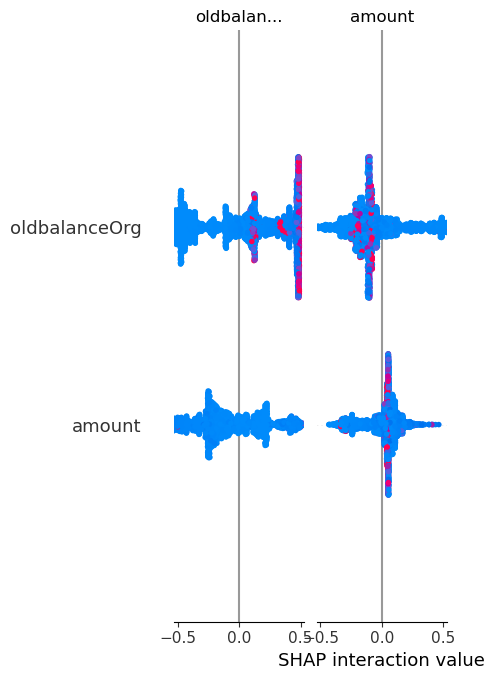

Shap Time Taken: 73.64 seconds


In [158]:
import shap
from sklearn.ensemble import RandomForestClassifier

# Train the Random Forest model
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

# Use SHAP after training
import shap
explainer = shap.TreeExplainer(rf,X_train)
shap_values = explainer.shap_values(X_test)

# Plot SHAP summary
shap.summary_plot(shap_values, X_test, feature_names=X_test.columns)

print(f"Shap Time Taken: {time.time() - start_time:.2f} seconds")


In [174]:
# joblib
import joblib
joblib.dump(rf, "random.joblib")
joblib.dump(xg,"xgboost.joblib")
joblib.dump(adaboost,"adaboost_model.pkl")
joblib.dump(dnn,"dnn.joblib")



['dnn.joblib']

In [160]:
model=joblib.load("adaboost.joblib")
new_values=[[0,3,2]]
pred= model.predict(new_values)
print("Prediction:", pred)


Prediction: [1]


c:\Users\santosh\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(


In [161]:
import pickle
with open("ada_model.pkl","wb") as fe:
    model = pickle.dump(ada,fe)

In [162]:
print(model)

None
